# SPEED DATING !

Ce projet est issu d'une compétition Kaggle, le thème : comment trouver l'amour ? Ou comment aider à déterminer les critèrs qui permettraient à un participant d'obtenir un second rendez-vous après un speed dating ? Ici, nous allons essayer de déterminer, à partir de notre dataset de d'outils de statistiques et de datavisualisations, les critères qui permettraient d'obtenir un second rendez-vous pour les participants d'une compétition de speed dating ? Argent ? Religion ? Hobbies ? Faites vos jeux !

#### Import des librairies

In [104]:
!pip install plotly -q
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn import metrics
from math import pi

#### Premières manipulations - lecture et découverte du dataset

In [105]:
df=pd.read_csv('Speed_Dating_Data.csv', encoding =  'ISO-8859-1')

In [106]:
df.shape

(8378, 195)

Ici, nous pouvons déjà nous rendre compte que le nombre de critères de l'étude est très large, puisqu'il y a 195 variables représentées. 

Nous ne les représenterons pas toutes, mais nous explorerons ces donnnées afin de déterminer quelles seraient justement ces variables pouvant impacter la décision d'un second rendez-vous. 

In [107]:
df.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [108]:
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

Nous pouvons également constater que ce dataset qui possède de nombreuses variables, a potentiellement beaucoup de valeurs manquantes, nous ferons atetntion à ce sujet, lors des imputations, afin de ne pas fausser le résultat.

Nous également ci dessous renommer certaines données afin de rendre plus compréhensible pour un lecteur.

In [109]:
#on remplace le nom des colonnes afin d'avoir une meilleure lisibilité
#sur les données de chaque colonnes

df.rename(columns={"gender": "Genre", 
                     "age_o":"age partenaire",
                     "race_o":"race partenaire",
                     "dec_o":"decision partenaire",
                     "imprace":"importance de la race",
                     "from":"origine",
                     "date":"fréquence des rendez-vous"}, inplace=True)

#Créer un dictionnaire avec des clés et des valeurs. On remplacera ensuite les clés du dataset
# pour les remplacer par des valeurs.

gender_changement = { 0 : 'Femme',1 : 'Homme'}

decision_changement={1:"Oui",0:"Non"}

samerace_changement={1:"Oui",0:"Non"}

race_changement = {1: 'Africain', 2: 'Européen', 3: 'Hispanique', 4: 'Asiatique', 5: 'Américain',6:'Autres'}

field_changement = {1:"Droit",2:"Math",3:"science sociale",4:"science medicale",5:"Ingénieur",6:"Journalisme",
                   7:"Histoire",8:"Econ/Finance",9:"Education",10:"Science biologique",11:"Social",12:"indécis",
                   13:"Science politique",14:"Film",15:"Beaux arts",16:"Langue",17:"Architecture",18:"Autres"}

In [110]:
#on remplace les clés du dataset par des noms que nous avons définis plus haut
df['Genre'].replace(gender_changement, inplace = True)
df["field_cd"].replace(field_changement, inplace = True)
df["decision partenaire"].replace(decision_changement, inplace = True)
df["race partenaire"].replace(race_changement, inplace = True)
df['race'].replace(race_changement, inplace = True)
df['dec'].replace(decision_changement, inplace = True)
df['samerace'].replace(samerace_changement, inplace = True)

In [111]:
#Vérification
df.head()

,iid,id,Genre,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Femme,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Femme,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Femme,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,Femme,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,Femme,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Analyse de données

#### Genre

In [116]:
Pie = [len(df[df["Genre"]=='homme']) , len(df[df["Genre"]=='femme'])]
Lab = ["Male","Female"]
color = ['#66b3ff','#99ff99']

Text(0.5, 1.0, 'Repartition by gender')

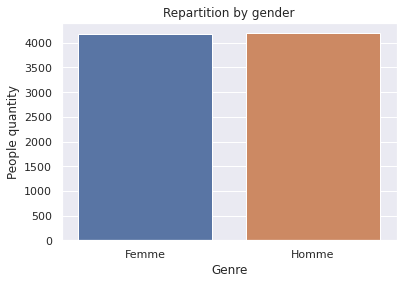

In [153]:
# Proportion du gender
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = df["Genre"])
ax.set_ylabel("People quantity")
ax.set_title("Repartition by gender")

Dans cette étude, nous constatons que le genre des personnes - hommes, femmes - est relativement bien réparti, puisque le ratio homme/femme est quasiment de moitié/ moitié. Nous pouvons donc dire qu'il y a là des données relativement équilibrées, pouvant être réprésentatives. Ce ratio quasiment équitable pourrait nous renseigner sur la sous ou non représentation de la communauté homosexuelle.

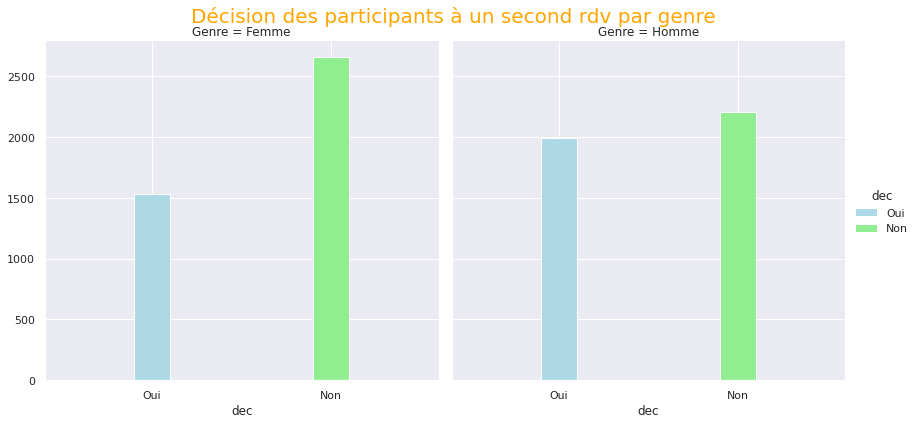

In [118]:
g = sns.FacetGrid(df, col='Genre',height = 6,hue_kws={'color': ['lightblue','lightgreen','y','g']}, hue="dec")
g.map(plt.hist, 'dec', bins=5)
axes = g.axes.flatten()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Décision des participants à un second rdv par genre", fontsize=20, color='orange')
g.add_legend();

Déjà, nous pouvons constater que si hommes et femmes sont également représentés, la décision de dire "oui" à un second rendez-vous se retrouve davantage chez les hommes que chez les femmes

#### Représentation des âges des participants

Text(0.5, 1.0, 'Repartition des âges des pariticipants')

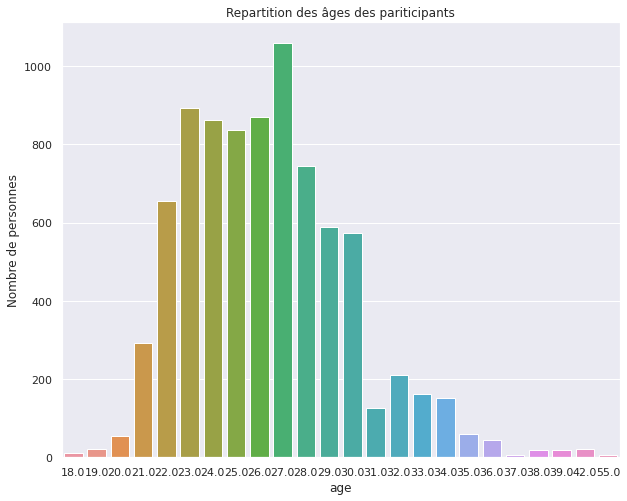

In [119]:
#répartition des ages :
plt.figure(figsize=(10,8))
sns.set_theme(style ="darkgrid")
ax = sns.countplot(x = df["age"])
ax.set_ylabel("Nombre de personnes")
ax.set_title("Repartition des âges des pariticipants")

La population qui a répondu aux différents questionnaires est relativement jeune, puisqu'on retrouve une sur-représentation de la tranche d'âge 22-30 ans.

#### Domaine d'études des participants

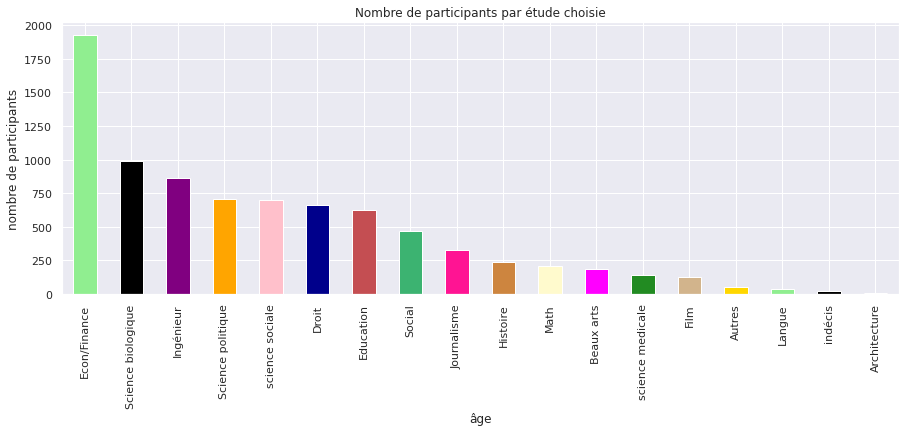

In [120]:
#Nous allons voir si la études choisies peuvent être une variable intéressante à choisir :
df_= df['field_cd'].value_counts()
df_.plot(kind='bar',
                    title='Nombre de participants par étude choisie',
                    ylabel='nombre de participants',
                    xlabel='âge',
                    color=['lightgreen','black','purple','orange','pink','darkblue','r',
                           'mediumseagreen','deeppink','peru','lemonchiffon',
                           'fuchsia','forestgreen','tan','gold'],
                    figsize=(15, 5),
                    legend = False)
plt.show()

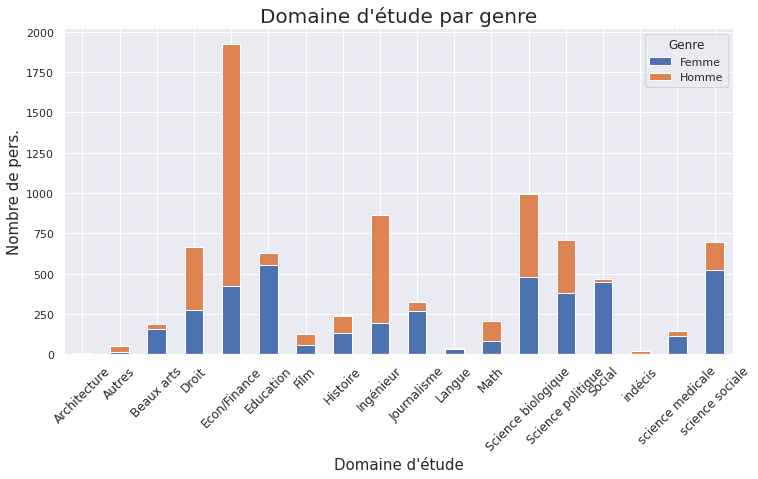

In [121]:
#On visualise la réparition des genres par domaines d'études :
df_field_gender = df[['Genre', 'field_cd']].groupby(['field_cd', 'Genre']).size().unstack()

ax = df_field_gender.plot(kind='bar', 
                    figsize=(12,6), 
                    stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), 
                    fontsize=12, 
                    rotation=45)
ax.set_title("Domaine d'étude par genre", fontsize=20)
ax.set_xlabel("Domaine d'étude",fontsize=15)
ax.set_ylabel("Nombre de pers.",fontsize=15)
plt.show()

Dans ces graphiques qui s'intéressent aux études des participants, il est intéressant de noter qu'il y a une sur-représentation des répondants ayant fait des études en économie et finance, suivi des sciences biologiques. Et dans ces études en économie, nous retrouvons de nouveaux une sur-représentation du genre masculin. Les femmes quant à elles sont plus représentées sur l'ensemble du panel des études réalisées, avec néanmoins une présence plus forte sur les domaines éducatives et sociales. 

#### Race

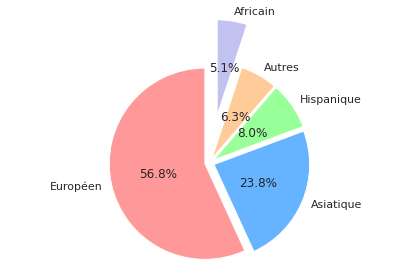

In [134]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
df_pie = df['race'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(df_pie.values,
        colors = colors,
        labels=data_pie.index,
        explode = (0.05,0.05,0.05,0.05,0.5),
        autopct='%1.1f%%',
        pctdistance=0.5,
        startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [87]:
SameRace=df['samerace']

Text(0.5, 1.0, 'Importance de la race')

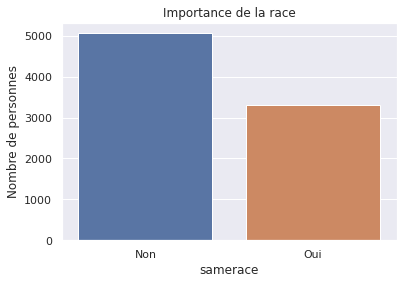

In [140]:
ax=sns.countplot(x=SameRace)
ax.set_ylabel("Nombre de personnes")
ax.set_title("Importance de la race")

Un autre critère représentée est celle de race: et de nouveau, on trouve un déséquilibre puisqu'il y a dans l'étude une sur-représentation de la race Européenne. Il semble que l'importance de la race pour un deuxième rendez-vous n'est plutôt pas important.

#### Synthèse : quels critères sont importants chez votre future partenaire ?

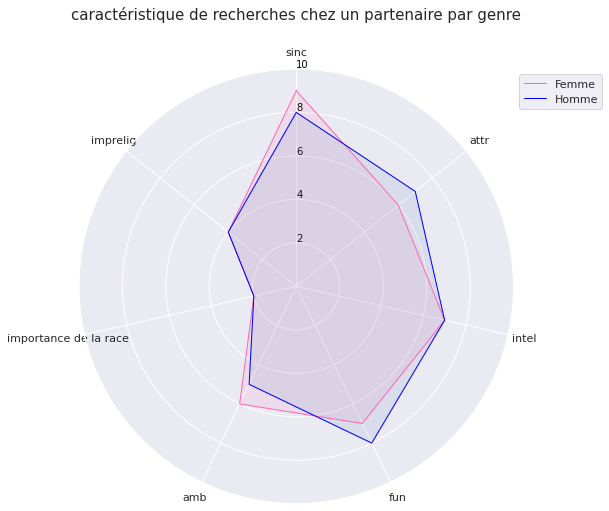

In [154]:
# Nous allons ici nous intéresser à ce ce que recherche les participants comme critères chez leur futur partenaire...
#set data
data = df[['Genre','sinc','attr','intel','fun','amb','importance de la race','imprelig']]

# ------- PART 1: Create background
# number of variable
categories=list(data)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8,10], ["2","4","6","8","10"], color="black", size=10)
plt.ylim(0,10)

# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
values=data.loc[0].drop('Genre').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Femme", color='hotpink')
ax.fill(angles, values, color='hotpink', alpha=0.1)
 
values=data.loc[1].drop('Genre').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Homme",color='blue')
ax.fill(angles, values, color='b', alpha=0.1)

plt.title('caractéristique de recherches chez un partenaire par genre', size=15, y=1.1)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Il semblerait finalement que les hommes et femmes recherchent quasiment les mêmes caractéristiques pour un partenaire, à quelques valeurs près !Néanmoins, ce graphique semble confirmé que les l'importance de la race ou de la religion est moindre par rapport aux qualités interpersonnelles des intéressés.

# Conclusion

Cette analyse nous a permis de mieux comprendre les différentes catégories du panel étudié, tel que le genre, la race, l'âge ou les domaines d'étude. 

Nous avons pu nous rendre compte que les données étudiés pouvaient suivant les domaines comportés des biais notamment par la sur-représentation de certaines variables, tel que le domaine d'étude, la tranche d'âge où la race.

Néanmoins, nous avons pu constater un critère discriminant lors de la prise de second rendez vous : il s'agit du genre. En effet, les femmes on tendance à moins accepter un second rendez-vous que les hommes. Poursuivre l'étude pour essayer de comprendre pourquoi, pourraient permettrent de mieux discerner les leviers pour la prise d'un second rendez-vous, en comparant ces deux populations.